# Decision Trees
Things covered in this tutorial - 

  1. Implementing Entropy and Gini index from scratch and visualizing them 
  2. Introduction to Decision Tree Classifier for 'car evaluation' dataset
      * train a decision tree on car evaluation dataset using sklearn library
      * how to handle categorical data?
      * visualize them in 3 different ways (starting from very basic text to nice plots)

  3. Visualization of decision boundaries learned by a decision tree
	    * train on a toy dataset
	    * plot the learned decision boundary

  4. How to use decision trees for regression?
      * tennis playing time prediction based on weather condition 
  
  5. Post-pruning of decision trees
	    * breast cancer detection where decision tree overfits
	    * relationship between the $\alpha$ and the depth of the tree
	    * how to choose optimal $\alpha$
	    * showing the efficacy of post-pruning in combating over-fitting
	    * before and after pruning tree visualization 
    
  6. Project: Bank loan approval prediction
      * how to handle missing data?
      * how to handle categorical and continuous data?
      * visualization of Randomforest






In [ ]:
# install decision tree visualization libraries
!pip -qq install dtreeviz 
!pip -qq install graphviz

     |████████████████████████████████| 61 kB 1.1 kB/s 


In [ ]:
# pandas to handle csv file
import pandas as pd

# numpy for some linear algebra operations
import numpy as np

# sklearn to call DecisionTree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_olivetti_faces


# matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# visualize decision trees
import graphviz

### Implementing Entropy and Gini Index 

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

 - Information gain

 - Gini index

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

Entropy and Gini Index are the two most commong splitting criterion for constructing a decision tree. They are defined as follows - 

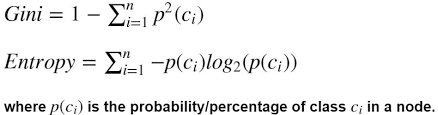


In the following sections, we will be implementing them as well as visualizing them.

In [ ]:
# Visualization of Entropy and Gini index used for Node splitting
# here we implement Entropy and Gini index from scratch
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def gini(p):
    return p * (1 - p) + (1 - p) * ( 1 - (1 - p) )

In [ ]:
# generate some data
x = np.arange(0, 1., 0.01)
# compute entropy and Gini index
ent = [entropy(p) if p != 0 else None for p in x]
gi = gini(x)

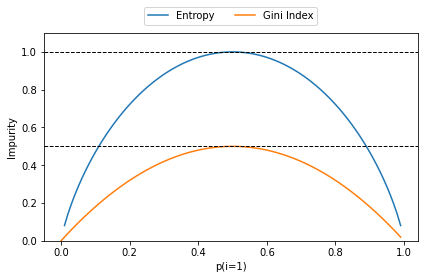

In [ ]:
# plot entropy and gini
plt.plot(x, ent, label = 'Entropy')
plt.plot(x, gi, label = 'Gini Index')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15),
           ncol = 3, fancybox = True, shadow = False)
plt.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
plt.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim([ 0, 1.1 ])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity')
plt.tight_layout()
plt.show()

In [ ]:
# download the required datasets
# 1. Car Evaluation dataset
# 2. Tennis dataset
# 3. Loan datset
! wget "https://iiitaphyd-my.sharepoint.com/:x:/g/personal/avijit_dasgupta_research_iiit_ac_in/EbSsNblEi_tBsApvJQpKrHkB7KHQ6_wFnRbUEjarXG0QdQ?e=wJCyKf&download=1" -O car_evaluation.csv
! wget "https://iiitaphyd-my.sharepoint.com/:t:/g/personal/avijit_dasgupta_research_iiit_ac_in/EYgjpApVvfZKgsGBhrxW2GsBZ5diP0lrGDHF5dyDQ2L68w?e=vy5ZEf&download=1" -O tennis_time.txt
! wget "https://iiitaphyd-my.sharepoint.com/:t:/g/personal/avijit_dasgupta_research_iiit_ac_in/EdKNSgQlPXRLl7uXQlpzn88BmeD_OiE01CsP7bl0uBaKhw?e=fZn3pS&download=1" -O loan_dataset.txt

--2022-02-18 09:14:19--  https://iiitaphyd-my.sharepoint.com/:x:/g/personal/avijit_dasgupta_research_iiit_ac_in/EbSsNblEi_tBsApvJQpKrHkB7KHQ6_wFnRbUEjarXG0QdQ?e=wJCyKf&download=1
Resolving iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/car_evaluation.csv [following]
--2022-02-18 09:14:20--  https://iiitaphyd-my.sharepoint.com/personal/avijit_dasgupta_research_iiit_ac_in/Documents/CSEDU-ML/car_evaluation.csv
Reusing existing connection to iiitaphyd-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [application/octet-stream]
Saving to: ‘car_evaluation.csv’

car_evaluation.csv  100%[===================>]  52.34K  --.-KB/s    in 0.007s  

2022-02-18 09:14:20 (7.06 MB/s) - ‘car_evaluati

### Application of decision tree classifier for car condition evaluation

In the following few sections, we will see how to use decision tree classifier for car condition evaluation. In this dataset, we have 6 features - 

1. buying - what is the buying rate of a particular car?
2. maint - how is the maintanance cost for the car?
3. doors - how many doors are there in the car?
4. persons -  how many persons can sit in the car?
5. lug_boot - boot space
6. safety - how safe the car is?

Based on these 6 features, we will learn a decision tree classifier. Once learned, we will predict the condition of the car on some test data and evaluate the accuracy of the model.

In [ ]:
# Data exploration [car evaluation]
# read the csv file
car_evaluation_df = pd.read_csv('car_evaluation.csv')
# adding column names for the ease of understanding
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_evaluation_df.columns = col_names


# print some rows of the dataset to better understand the dataframe
car_evaluation_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


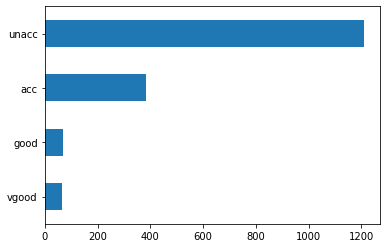

In [ ]:
# check the number of samples in each clases and plot them as bar chart
car_evaluation_df['class'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
# check if there is any missing values in any columns
car_evaluation_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# lets seperate out the feature vectors and the class variables
X = car_evaluation_df.drop(['class'], axis=1)
y = car_evaluation_df['class']

### Ordinal Encoder
Encode categorical features as an integer array.

For example, it converts input to output in the following way - 



```
input: [['Male', 1], ['Female', 3], ['Female', 2]]

output: array([[0., 0.], [1., 2.], [1., 1.]])
```



In [ ]:
# convert the feature vectores into numeric ones
encoder = OrdinalEncoder()
encoder.fit(X)
X = encoder.transform(X)

In [ ]:
# split the whole dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# TODO": print the shape of the X_train and X_test
print("TODO")
print("TODO")

TODO
TODO


In [ ]:
# let's build the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# fit the train data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
# predict on the test data using the trained model
y_pred = clf.predict(X_test)

In [ ]:
# evaluate the classifier
acc = accuracy_score(y_test, y_pred)
print("Entropy based Decision Tree classifier achieves {}% accuracy on the car evaluation dataset".format(acc * 100))

Entropy based Decision Tree classifier achieves 73.98843930635837% accuracy on the car evaluation dataset


### Decision tree visualization
Now, we will visualize the decision trees in three possible ways

In [ ]:
# let's now visualize the decision tree learnt
# export_tree is an in-built function inside the sklearn library
# text representation of the same decision tree
text_representation = export_text(clf)
# Display result
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: acc
|   |   |--- feature_0 >  2.50
|   |   |   |--- class: unacc
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: unacc
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: acc



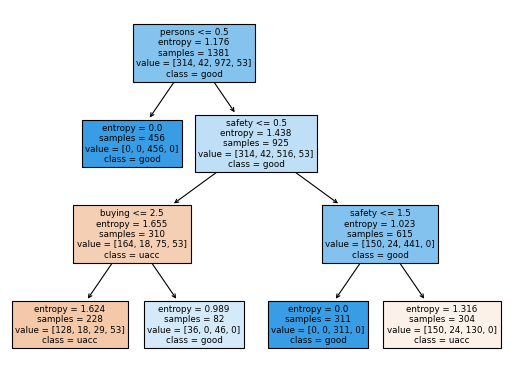

In [ ]:
# let's now visualize the decision tree learnt
# plot_tree is an in-built function inside the sklearn library
# Note that, the values of each features are encoder values, not their original values
# filled = True uses color coding for majority of classes
figure(figsize=(8, 6), dpi=80)
plot_tree(clf, filled=True, feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], class_names = ['uacc', 'acc', 'good', 'vgood']);

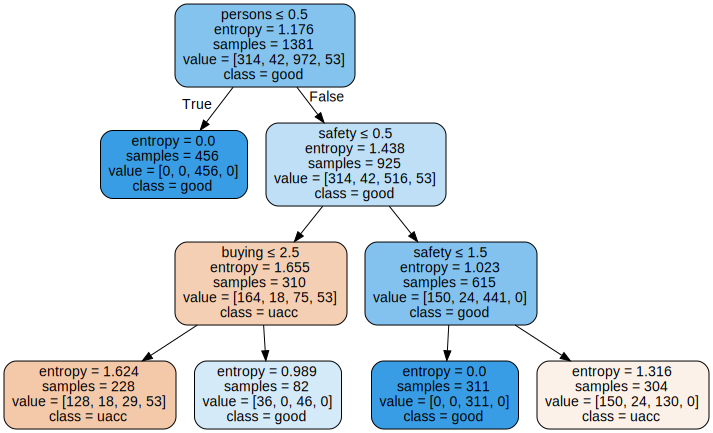

In [ ]:
# A more sophisticated visualization
dot_data = export_graphviz(clf,
                          feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
                          class_names = ['uacc', 'acc', 'good', 'vgood'], 
                          filled=True, rounded=True,  
                          special_characters=True)

graph = graphviz.Source(dot_data) 
graph

### Decision boundary visualization

In this section, we would like to visualize the decision boundary learnt by the decision tree. For this, we create a 2D dataset with 6 classes. We then train a decision tree classifier using the procedure above. We then plot the decision boundary.

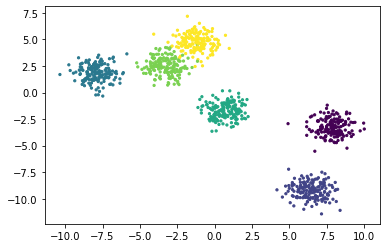

In [ ]:
# visualizing decision boundaries

# Create a 2D toy dataset
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=6, random_state=6)
# plot the generate datapoints
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis');

In [ ]:
# initialize a decision tree and train using X and Y
clf = DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

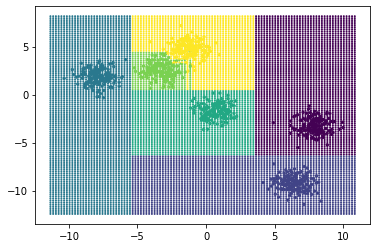

In [ ]:
# now we make predictions on some datapoints generated between a fixed interval
# based on the predictions we will plot the decision boundary learnt by our model
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
outcome = clf.predict(np.c_[xx.ravel(), yy.ravel()])

plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### Regression

Till now, we have seen how to use decision tree for a classification tasks. Now, we will use decision tree to solve a regression problem. 

In this section, we take a dataset called 'tennis-time' where given a weather condition, the task is to predict the playing time. So, the playing time is a real-valued variable here. 

In [ ]:
# decision tree for regression
# load the tennis_time dataset 
play_time = pd.read_csv('tennis_time.txt')
play_time.head()

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62


In [ ]:
# like previous example, we first need to convert categorical features into numbers
X = play_time.drop(["time"], axis = 1)
Y = play_time['time']

encoder = OrdinalEncoder()
encoder.fit(X)
X = encoder.transform(X)
print(X)

[[2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]
 [2. 2. 0. 0.]
 [2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [2. 2. 1. 1.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 2. 0. 1.]]


In [ ]:
reg = DecisionTreeRegressor()
reg.fit(X, Y)

DecisionTreeRegressor()

In [ ]:
# TODO: Visualize the decision tree using one of the methods discussed above
# Make sure you can see the feature names and class names in the diagram.
'''
figure(figsize=(8, 6), dpi=80)
func(reg, ...)
'''

# first uncomment the code
# please replace 'func' with an appropiate function which visualizes the tree. 
# fix the arguments (...) too to show the feature and class names


'\nfigure(figsize=(8, 6), dpi=80)\nfunc(reg, ...)\n'

In [ ]:
# you can also view the importance of each features
reg.feature_importances_

array([0.29746223, 0.38824339, 0.14515689, 0.16913749])

### Handling overfitting of decision boundary via Post-pruning

As discussed in the lecture, decision trees are prone to overfit on the training data. To overcome this issues, we have a technique called post-pruning. In this technique, we prune the decision trees and help it to generalize. 

A nice lecture on this can be referenced in future: https://www.youtube.com/watch?v=D0efHEJsfHo

Don't forget to check out the trees visually as well as metric-wise before and after pruning. 

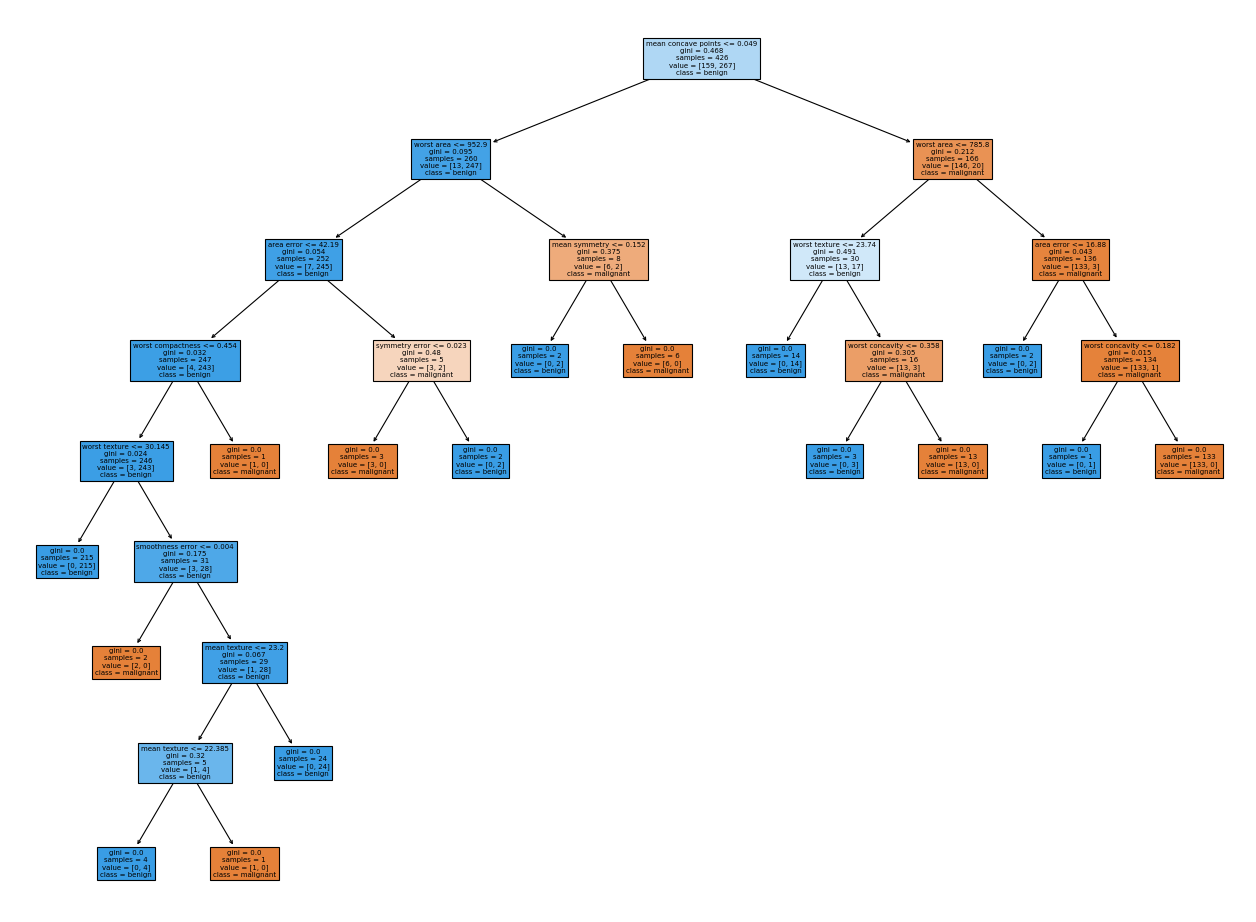

In [ ]:
# post-pruning in decisiontree 
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
figure(figsize=(20, 15), dpi=80)
plot_tree(clf, filled=True, feature_names = data.feature_names, class_names = data.target_names);

In [ ]:
# calculate the training and validation accuracies
train_acc  = accuracy_score(clf.predict(X_train), y_train)
test_acc  = accuracy_score(clf.predict(X_test), y_test)
print("Before pruning: train acc: {}, test acc: {}".format(train_acc * 100, test_acc * 100))
# Notice the difference between train and test accuracies. Clear case of overfitting

Before pruning: train acc: 100.0, test acc: 90.9090909090909


### Post-pruning

In Post pruning, we grow a large tree T0 and then prune it back in order to obtain a subtree such that we get the lowest test error rate.

Now, the problem with this algorithm is that we don’t want to go to every subtree and choose each one of them to calculate the change in the test error rate.

Cost complexity Pruning or Weakest link Pruning helps us with that. It introduces a new term, $\alpha$. We pick only those trees which are indexed by this $\alpha$.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []

# build classifiers for all alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

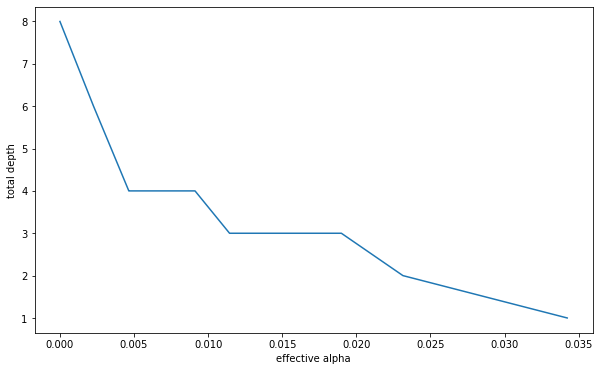

In [ ]:
# plot depth vs alphas. Notice, the depth decreases as we increase the alphas
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

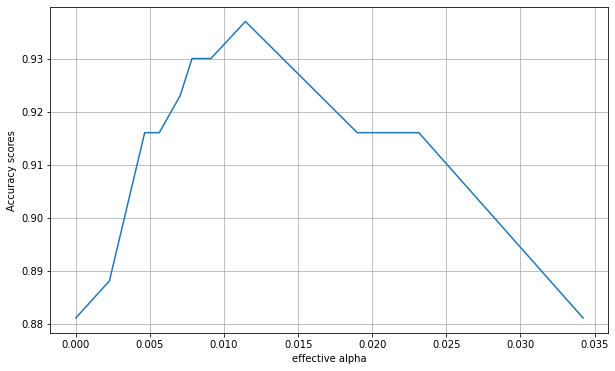

In [ ]:
# finding the optimal alpha [validation acc max -> optimal alpha]
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

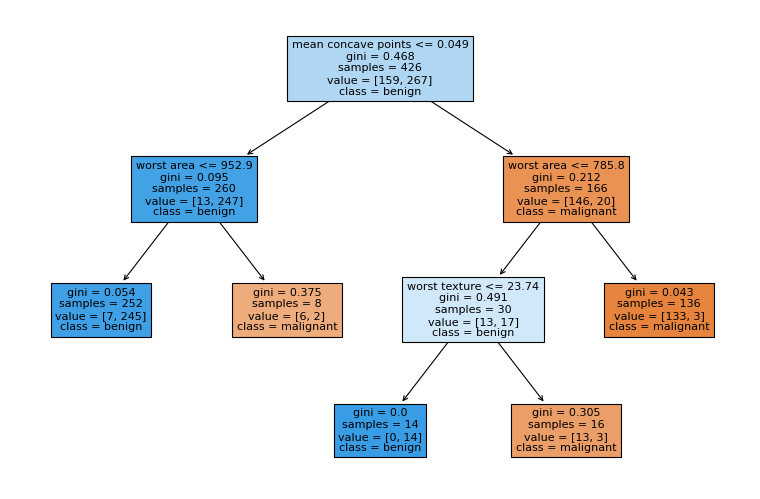

In [ ]:
# the optimal alpha is around 0.012 in our case. Now train a model with this alpha and check the decision tree

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train, y_train)
figure(figsize=(12, 8), dpi=80)
plot_tree(clf, filled=True, feature_names = data.feature_names, class_names = data.target_names);
# compare the decision tree before and after pruning

In [ ]:
# calculate the training and validation accuracies
train_acc  = accuracy_score(clf.predict(X_train), y_train)
test_acc  = accuracy_score(clf.predict(X_test), y_test)
print("After pruning: train acc: {}, test acc: {}".format(train_acc * 100, test_acc * 100))


After pruning: train acc: 96.47887323943662, test acc: 93.7062937062937


### Real-world applications of decision trees - 1

Suppose, we are a bank and we have details of our customers. For example, we know whether the customer is self-employed, whether they are married, how much their income is etc. 

Now, if someonce comes to use and ask for a loan, should we give them the money or not? What is the chance of getting the money from that customer?

To solve this problem, we will make use of decision tree here. If you look closely, this is a two-class classification problem. Features can be continuous or categorical values. There can be some features with missing values. How do you handle them? we will learn all of these in the following sections

In [ ]:
loan_df = pd.read_csv("loan_dataset.txt")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_df = loan_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

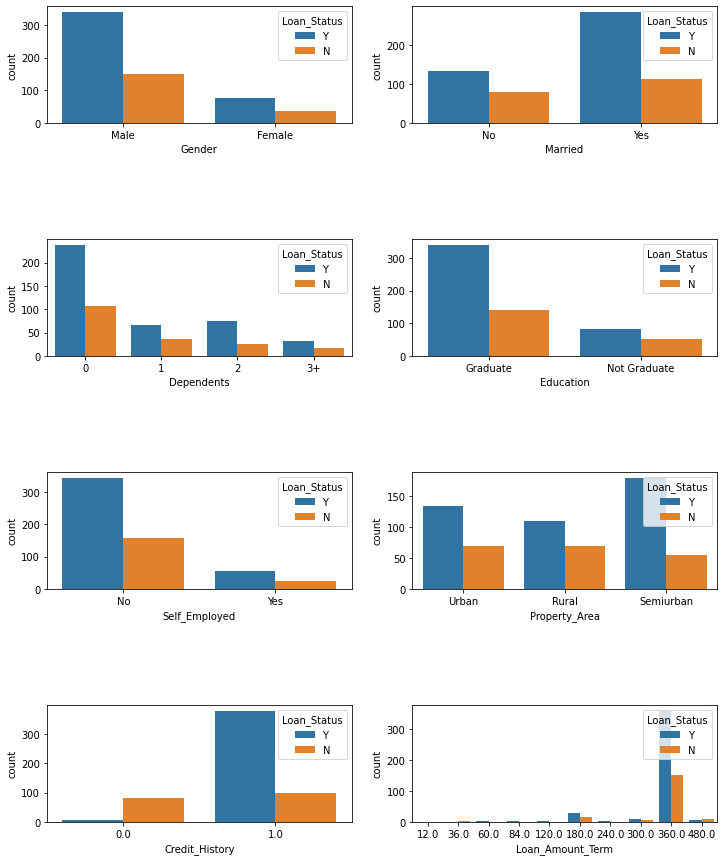

In [ ]:
# Data Visualization
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


In [ ]:
# Encode categorical features
# this time we will see we can also use pandas to do that instead of sklearn
# not how only categorical variables are encoded not continuous ones
train_df_encoded = pd.get_dummies(train_df,drop_first = True, columns = categorical_columns)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,5849,0.0,NaN,Y,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,4583,1508.0,128.0,N,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3000,0.0,66.0,Y,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
3,2583,2358.0,120.0,Y,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
4,6000,0.0,141.0,Y,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [ ]:
# separate out the features and targets
X = train_df_encoded.drop(columns='Loan_Status')
y = train_df_encoded['Loan_Status'].eq('Y').mul(1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [ ]:
# fill/impute the missing values using the mean
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [ ]:
# Model 1: Decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test_imp)
print("Validation Data Set Accuracy: {}%".format(accuracy_score(y_test,y_predict) * 100))

Validation Data Set Accuracy: 70.73170731707317%


In [ ]:
# TODO: Visualize the tree in any of the methods mentioned above
'''
figure(figsize=(8, 6), dpi=80)
func(reg, ...)
'''

# first uncomment the code
# please replace 'func' with an appropiate function which visualizes the tree. 
# fix the arguments (...) too to show the feature and class names

'\nfigure(figsize=(8, 6), dpi=80)\nfunc(reg, ...)\n'

In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test_imp)
print("Validation Data Set Accuracy: {}%".format(accuracy_score(y_test,y_predict) * 100))

Validation Data Set Accuracy: 64.22764227642277%


### References:

1. StatQuest: https://youtu.be/7VeUPuFGJHk
2. Some theories on Decision Trees: https://www.cs.cmu.edu/~./awm/tutorials/dtree18.pdf
3. Practical Applications: https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53

4. Post-pruning: https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/